<a href="https://colab.research.google.com/github/LakshmiAjay/ML-DS/blob/main/10_Multilayer_NN_for_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X=np.array([[0,0,1,1],[0,1,0,1]])
Y=np.array([[0,1,1,0]])

In [ ]:
n_x=2
n_y=1
n_h=2
m=X.shape[1]
lr=0.1
np.random.seed(2)
w1=np.random.rand(n_h,n_x)
w2=np.random.rand(n_y,n_h)
loses=[]

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def forw_prop(w1,w2,x):
  z1=np.dot(w1,x)
  a1=sigmoid(z1)
  z2=np.dot(w2,a1)
  a2=sigmoid(z2)
  return z1,a1,z2,a2
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
  dz2 =a2-y
  dw2 = np.dot(dz2,a1.T)/m
  dz1=np.dot(w2.T,dz2)*a1*(1-a1)
  dw1=np.dot(dz1,X.T)/m
  dw1=np.reshape(dw1,w1.shape)
  dw2=np.reshape(dw2,w2.shape)
  return dz2,dw2,dz1,dw1



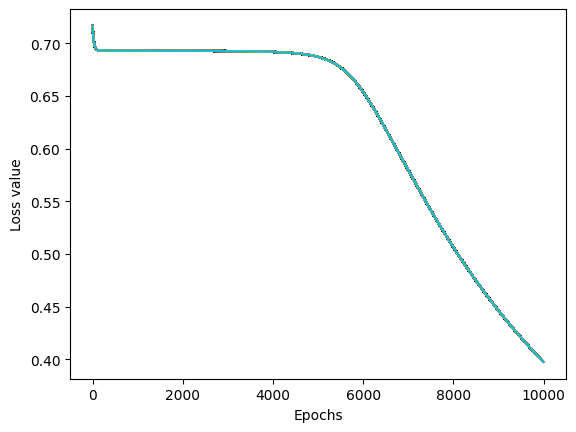

In [ ]:
ii=10000
for i in range(ii):
  z1,a1,z2,a2=forw_prop(w1,w2,X)
  loss= -(1/m)*np.sum(Y*np.log(a2)+(1-Y)*np.log(1-a2))
  loses.append(loss)
  da2,dw2,dz1,dw1=back_prop(m,w1,w2,z1,a1,z2,a2,Y)
  w2=w2-lr*dw2
  w1=w1-lr*dw1
  plt.plot(loses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss value")

In [ ]:
def predict(w1,w2,input):
  z1,a1,z2,a2=forw_prop(w1,w2,test)
  a2=np.squeeze(a2)
  # print(a2)
  if a2>=0.5:
    print("For input",[i[0] for i in input],"output is 1")
  else:
    print("For input",[i[0] for i in input],"output is 0")

In [ ]:
test=np.array([[1],[0]])
predict(w1,w2,test)
test=np.array([[0],[0]])
predict(w1,w2,test)
test=np.array([[0],[1]])
predict(w1,w2,test)
test=np.array([[1],[1]])
predict(w1,w2,test)

For input [1, 0] output is 1
For input [0, 0] output is 0
For input [0, 1] output is 1
For input [1, 1] output is 0
